In [48]:
#import libraries
import pandas as pd
import numpy as np
import math as m
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [49]:
# Chargement des données
df = pd.read_csv("advertising.csv")
# Découvrir les principales caractéristiques des données
print(df.head())  # Affiche les premières lignes du dataframe
print(df.info())  # Affiche les informations sur les colonnes et les types de données

# Initialisation des variables
X = df["TV"].values
y = df["Sales"].values

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


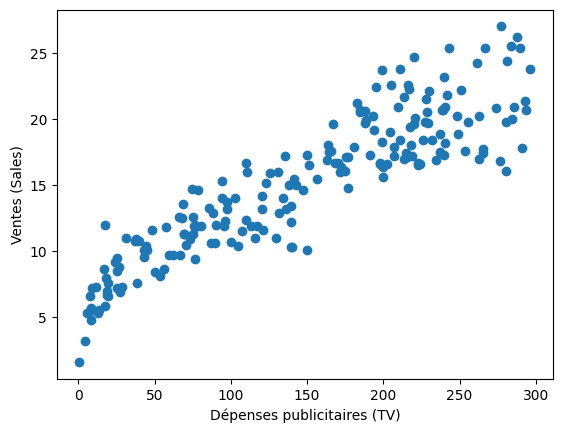

In [50]:
#Visualisation la base de données avec matplotlib
plt.scatter(X, y)
plt.xlabel("Dépenses publicitaires (TV)")
plt.ylabel("Ventes (Sales)")
plt.show()

In [51]:
# division la base de données en base d’apprentissage et base de test (80% pour la base d’apprentissage et 20% pour la base de test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [52]:
def MSE(X, y, W):
    """Calcule la moyenne des erreurs entre la valeur théorique et la valeur réelle."""

    y_pred = W[0] + W[1] * X
    err = y_pred - y
    return np.mean(err ** 2)

In [53]:
def Gradient(X, y, W):
    """Calcule le gradient de la fonction de perte MSE."""

    y_pred = W[0] + W[1] * X
    err = y_pred - y
    grad = np.array([np.sum(err), np.sum(err * X)])
    return grad

In [57]:
def MiseJour(grad, W, alpha):
    """Met à jour les paramètres W en utilisant la méthode de descente de gradient."""
    W[0] =W[0]- alpha * grad[0].astype(np.int64)
    W[1] =W[1] -alpha * grad[1].astype(np.int64)
    return W

In [67]:
def BatchGradientDescent(X, y, W, N_max, alpha, eps):
    """Exécute la méthode de descente de gradient sur le jeu de données d'apprentissage.

    Args:
        X: Matrice des données d'apprentissage.
        y: Vecteur des valeurs cibles d'apprentissage.
        W: Vecteur des paramètres initiaux.
        N_max: Nombre maximum d'itérations.
        alpha: Taux d'apprentissage.
        eps: Critère d'arrêt.

    Returns:
        Les meilleurs paramètres estimés.
    """

    mse_history = []
    W = W.copy()

    for i in range(N_max):
        grad = Gradient(X, y, W)
        W = MiseJour(grad, W, alpha)

        mse = MSE(X, y, W)
        mse_history.append(mse)
        if i>2:
         if np.abs(mse - mse_history[-2]) < eps:
             break


    return W, mse_history

C:\Users\Hamid\AppData\Local\Temp\ipykernel_13524\1480548670.py:3: RuntimeWarning: invalid value encountered in cast
  W[0] =W[0]- alpha * grad[0].astype(np.int64)
C:\Users\Hamid\AppData\Local\Temp\ipykernel_13524\1480548670.py:4: RuntimeWarning: invalid value encountered in cast
  W[1] =W[1] -alpha * grad[1].astype(np.int64)


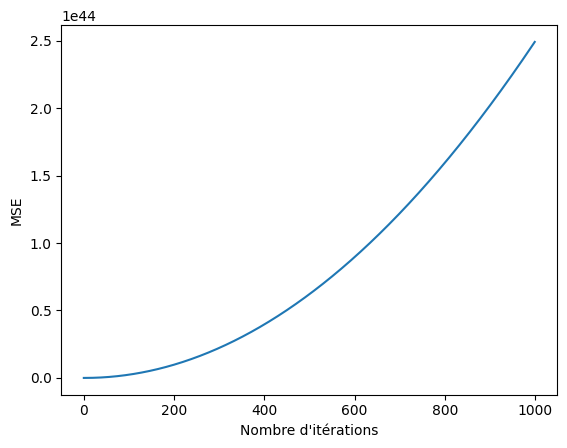

In [71]:
X_train=X_train.astype(np.float64)
y_train=y_train.astype(np.float64)
W, mse_history = BatchGradientDescent(X_train, y_train,np.array([8.0, 8.0], dtype=np.float64), 1000, 0.01, 1e-6)

plt.plot(mse_history)
plt.xlabel("Nombre d'itérations")
plt.ylabel("MSE")
plt.show()

In [72]:
y_pred = W[0] + W[1] * X_test
mse = MSE(X_test, y_test, W)

print("Erreur du modèle :", mse)

Erreur du modèle : 2.4042388681458003e+44
